# Rendimiento simple y logaritmico de acciones.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime
import math

In [96]:
ticker='PG'
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

[*********************100%%**********************]  1 of 1 completed


In [97]:
PG.head()

,Adj Close
Date,
1995-01-03,7.529935
1995-01-04,7.469576
1995-01-05,7.363945
1995-01-06,7.379036
1995-01-09,7.348853


In [98]:
PG.tail()

,Adj Close
Date,
2017-03-16,75.101341
2017-03-17,74.739967
2017-03-20,74.920654
2017-03-21,74.896019
2017-03-22,74.731766


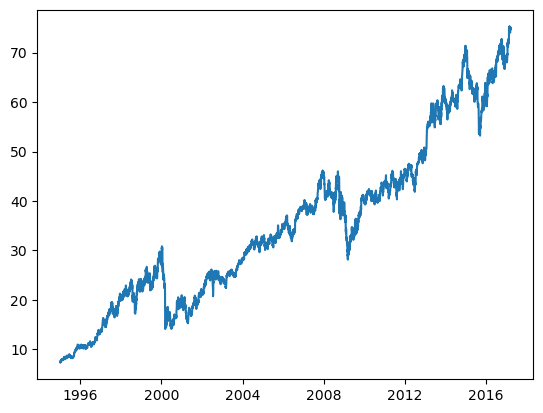

In [99]:
plt.plot(PG)

Simple rate of return

$$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$$

In [100]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1) - 1)

In [101]:
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-16    0.000438
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
Name: simple_return, Length: 5595, dtype: float64


<Axes: xlabel='Date'>

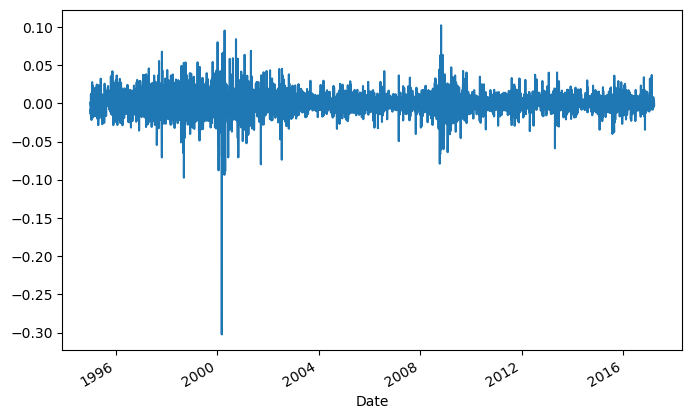

In [102]:
PG['simple_return'].plot(figsize=(8,5))

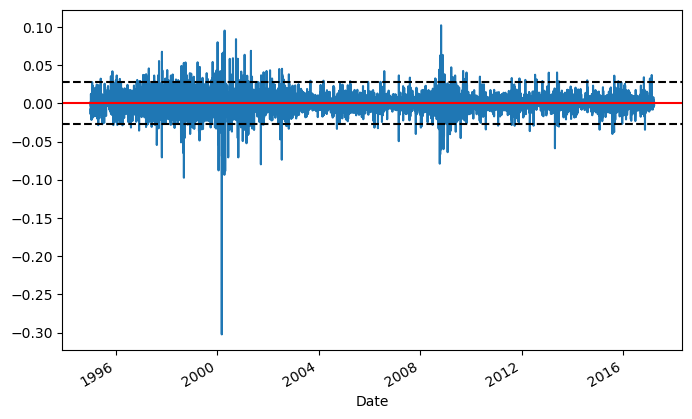

In [103]:
media = np.mean(PG['simple_return'])
desviacion = np.std(PG['simple_return'])
limite_inferior = media - 1.96*desviacion
limite_superior = media + 1.96*desviacion

PG['simple_return'].plot(figsize=(8,5))
plt.axhline(y=limite_inferior, color='black', linestyle='--', label=f'Límite Inferior ({limite_inferior:.2f})')
plt.axhline(y=limite_superior, color='black', linestyle='--', label=f'Límite Superior ({limite_superior:.2f})')
plt.axhline(y=media, color='red', linestyle='-', label=f'Media ({media:.2f})')

In [104]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario

0.0005143589230532327

In [105]:
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252 
# Así, el retorno anual es

In [106]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.12858973076330818

In [107]:
print(str(round(avg_returns_a, 5) * 100) + '%') 

12.859000000000002%


Retorno logaritmo
\begin{equation*}
r_{log} = log \left( \frac{p_1}{p_0} \right)
\end{equation*}

\begin{equation*}
x \approx ln(x + 1) \ x \rightarrow 0 
\end{equation*}

In [108]:
PG['simple_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

In [109]:
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2017-03-16    0.000438
2017-03-17   -0.004823
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002195
Name: simple_return, Length: 5595, dtype: float64


<Axes: xlabel='Date'>

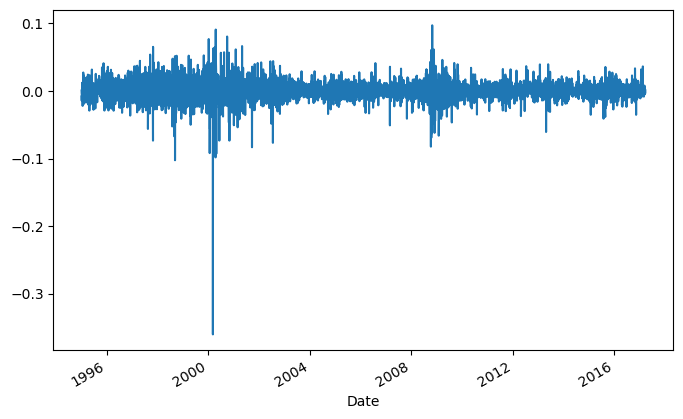

In [110]:
PG['simple_return'].plot(figsize=(8,5))

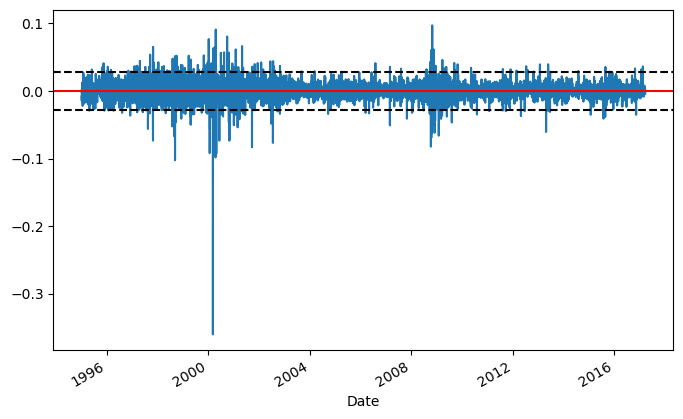

In [111]:
media = np.mean(PG['simple_return'])
desviacion = np.std(PG['simple_return'])
limite_inferior = media - 1.96*desviacion
limite_superior = media + 1.96*desviacion

PG['simple_return'].plot(figsize=(8,5))
plt.axhline(y=limite_inferior, color='black', linestyle='--', label=f'Límite Inferior ({limite_inferior:.2f})')
plt.axhline(y=limite_superior, color='black', linestyle='--', label=f'Límite Superior ({limite_superior:.2f})')
plt.axhline(y=media, color='red', linestyle='-', label=f'Media ({media:.2f})')

In [112]:
PG['simple_return'] = PG['simple_return'].fillna(0)  # O algún otro método de manejo de NaN
x = min(PG['simple_return'])
print(x)

-0.3600503690163068
